In [2]:
import numpy as np
import random
import matplotlib.pyplot as plt
from scipy.stats import nbinom
import time
from matplotlib.colors import ListedColormap, LinearSegmentedColormap
import math
import copy
import scipy
import pickle

from scipy.stats import poisson

In [3]:
# Across all plots
sigmas = np.arange(0,0.99, 0.01)
betas = np.arange(0.5,3.01, 0.02)
emr_max = 0.1750813008130082

# Fig S2A

In [4]:
def get_em_rate_figS2(mu=1e-4, beta=1, gamma=0.5, R=0.99, sigma=0.4, sigma21=0.0):
    I=1-R
    poisson_mu = beta*(1-sigma21)*R/gamma

    z = np.arange(poisson.ppf(0.0001, poisson_mu), poisson.ppf(0.9999, poisson_mu))
    
    # Pure Poisson offspring distribution:
    #Pz = poisson.pmf(z, poisson_mu)
    #d = get_extinction_prob_from_zdist(Pz)
    
    # Offspring distribution taking exponential recovery time into account:
    #Pz = 1/poisson_mu
    d = min(1,1/poisson_mu)


    em_rate = I * mu * beta * R * (1-sigma) * (1-d)
    #print("Emergence rate:", em_rate)

    return em_rate

def get_em_rate_at_equi_figS2(mu=1e-4, beta=1, gamma=0.5, sigma=0.4, sigma21=0):
    R = gamma/(beta * (1-sigma))
    if R > 1:
        R = 1
    er = get_em_rate_figS2(mu=mu, beta=beta, gamma=gamma, R=R, sigma=sigma, sigma21=sigma21)
    return er

In [5]:
em_rates = []
bs_out = []
ss_out = []
n_sims = len(sigmas) * len(betas)

sigma_c = 0

i=0
for s in sigmas:
    for b in betas:
        em_rates.append(get_em_rate_at_equi_figS2(beta=b, sigma=s, mu=1, sigma21=sigma_c))
        bs_out.append(b)
        ss_out.append(s)
        print(f"{i} out of {n_sims}")
        i += 1

0 out of 12474
1 out of 12474
2 out of 12474
3 out of 12474
4 out of 12474
5 out of 12474
6 out of 12474
7 out of 12474
8 out of 12474
9 out of 12474
10 out of 12474
11 out of 12474
12 out of 12474
13 out of 12474
14 out of 12474
15 out of 12474
16 out of 12474
17 out of 12474
18 out of 12474
19 out of 12474
20 out of 12474
21 out of 12474
22 out of 12474
23 out of 12474
24 out of 12474
25 out of 12474
26 out of 12474
27 out of 12474
28 out of 12474
29 out of 12474
30 out of 12474
31 out of 12474
32 out of 12474
33 out of 12474
34 out of 12474
35 out of 12474
36 out of 12474
37 out of 12474
38 out of 12474
39 out of 12474
40 out of 12474
41 out of 12474
42 out of 12474
43 out of 12474
44 out of 12474
45 out of 12474
46 out of 12474
47 out of 12474
48 out of 12474
49 out of 12474
50 out of 12474
51 out of 12474
52 out of 12474
53 out of 12474
54 out of 12474
55 out of 12474
56 out of 12474
57 out of 12474
58 out of 12474
59 out of 12474
60 out of 12474
61 out of 12474
62 out of 12474
63

1979 out of 12474
1980 out of 12474
1981 out of 12474
1982 out of 12474
1983 out of 12474
1984 out of 12474
1985 out of 12474
1986 out of 12474
1987 out of 12474
1988 out of 12474
1989 out of 12474
1990 out of 12474
1991 out of 12474
1992 out of 12474
1993 out of 12474
1994 out of 12474
1995 out of 12474
1996 out of 12474
1997 out of 12474
1998 out of 12474
1999 out of 12474
2000 out of 12474
2001 out of 12474
2002 out of 12474
2003 out of 12474
2004 out of 12474
2005 out of 12474
2006 out of 12474
2007 out of 12474
2008 out of 12474
2009 out of 12474
2010 out of 12474
2011 out of 12474
2012 out of 12474
2013 out of 12474
2014 out of 12474
2015 out of 12474
2016 out of 12474
2017 out of 12474
2018 out of 12474
2019 out of 12474
2020 out of 12474
2021 out of 12474
2022 out of 12474
2023 out of 12474
2024 out of 12474
2025 out of 12474
2026 out of 12474
2027 out of 12474
2028 out of 12474
2029 out of 12474
2030 out of 12474
2031 out of 12474
2032 out of 12474
2033 out of 12474
2034 out o

2977 out of 12474
2978 out of 12474
2979 out of 12474
2980 out of 12474
2981 out of 12474
2982 out of 12474
2983 out of 12474
2984 out of 12474
2985 out of 12474
2986 out of 12474
2987 out of 12474
2988 out of 12474
2989 out of 12474
2990 out of 12474
2991 out of 12474
2992 out of 12474
2993 out of 12474
2994 out of 12474
2995 out of 12474
2996 out of 12474
2997 out of 12474
2998 out of 12474
2999 out of 12474
3000 out of 12474
3001 out of 12474
3002 out of 12474
3003 out of 12474
3004 out of 12474
3005 out of 12474
3006 out of 12474
3007 out of 12474
3008 out of 12474
3009 out of 12474
3010 out of 12474
3011 out of 12474
3012 out of 12474
3013 out of 12474
3014 out of 12474
3015 out of 12474
3016 out of 12474
3017 out of 12474
3018 out of 12474
3019 out of 12474
3020 out of 12474
3021 out of 12474
3022 out of 12474
3023 out of 12474
3024 out of 12474
3025 out of 12474
3026 out of 12474
3027 out of 12474
3028 out of 12474
3029 out of 12474
3030 out of 12474
3031 out of 12474
3032 out o

3981 out of 12474
3982 out of 12474
3983 out of 12474
3984 out of 12474
3985 out of 12474
3986 out of 12474
3987 out of 12474
3988 out of 12474
3989 out of 12474
3990 out of 12474
3991 out of 12474
3992 out of 12474
3993 out of 12474
3994 out of 12474
3995 out of 12474
3996 out of 12474
3997 out of 12474
3998 out of 12474
3999 out of 12474
4000 out of 12474
4001 out of 12474
4002 out of 12474
4003 out of 12474
4004 out of 12474
4005 out of 12474
4006 out of 12474
4007 out of 12474
4008 out of 12474
4009 out of 12474
4010 out of 12474
4011 out of 12474
4012 out of 12474
4013 out of 12474
4014 out of 12474
4015 out of 12474
4016 out of 12474
4017 out of 12474
4018 out of 12474
4019 out of 12474
4020 out of 12474
4021 out of 12474
4022 out of 12474
4023 out of 12474
4024 out of 12474
4025 out of 12474
4026 out of 12474
4027 out of 12474
4028 out of 12474
4029 out of 12474
4030 out of 12474
4031 out of 12474
4032 out of 12474
4033 out of 12474
4034 out of 12474
4035 out of 12474
4036 out o

4899 out of 12474
4900 out of 12474
4901 out of 12474
4902 out of 12474
4903 out of 12474
4904 out of 12474
4905 out of 12474
4906 out of 12474
4907 out of 12474
4908 out of 12474
4909 out of 12474
4910 out of 12474
4911 out of 12474
4912 out of 12474
4913 out of 12474
4914 out of 12474
4915 out of 12474
4916 out of 12474
4917 out of 12474
4918 out of 12474
4919 out of 12474
4920 out of 12474
4921 out of 12474
4922 out of 12474
4923 out of 12474
4924 out of 12474
4925 out of 12474
4926 out of 12474
4927 out of 12474
4928 out of 12474
4929 out of 12474
4930 out of 12474
4931 out of 12474
4932 out of 12474
4933 out of 12474
4934 out of 12474
4935 out of 12474
4936 out of 12474
4937 out of 12474
4938 out of 12474
4939 out of 12474
4940 out of 12474
4941 out of 12474
4942 out of 12474
4943 out of 12474
4944 out of 12474
4945 out of 12474
4946 out of 12474
4947 out of 12474
4948 out of 12474
4949 out of 12474
4950 out of 12474
4951 out of 12474
4952 out of 12474
4953 out of 12474
4954 out o

5871 out of 12474
5872 out of 12474
5873 out of 12474
5874 out of 12474
5875 out of 12474
5876 out of 12474
5877 out of 12474
5878 out of 12474
5879 out of 12474
5880 out of 12474
5881 out of 12474
5882 out of 12474
5883 out of 12474
5884 out of 12474
5885 out of 12474
5886 out of 12474
5887 out of 12474
5888 out of 12474
5889 out of 12474
5890 out of 12474
5891 out of 12474
5892 out of 12474
5893 out of 12474
5894 out of 12474
5895 out of 12474
5896 out of 12474
5897 out of 12474
5898 out of 12474
5899 out of 12474
5900 out of 12474
5901 out of 12474
5902 out of 12474
5903 out of 12474
5904 out of 12474
5905 out of 12474
5906 out of 12474
5907 out of 12474
5908 out of 12474
5909 out of 12474
5910 out of 12474
5911 out of 12474
5912 out of 12474
5913 out of 12474
5914 out of 12474
5915 out of 12474
5916 out of 12474
5917 out of 12474
5918 out of 12474
5919 out of 12474
5920 out of 12474
5921 out of 12474
5922 out of 12474
5923 out of 12474
5924 out of 12474
5925 out of 12474
5926 out o

6678 out of 12474
6679 out of 12474
6680 out of 12474
6681 out of 12474
6682 out of 12474
6683 out of 12474
6684 out of 12474
6685 out of 12474
6686 out of 12474
6687 out of 12474
6688 out of 12474
6689 out of 12474
6690 out of 12474
6691 out of 12474
6692 out of 12474
6693 out of 12474
6694 out of 12474
6695 out of 12474
6696 out of 12474
6697 out of 12474
6698 out of 12474
6699 out of 12474
6700 out of 12474
6701 out of 12474
6702 out of 12474
6703 out of 12474
6704 out of 12474
6705 out of 12474
6706 out of 12474
6707 out of 12474
6708 out of 12474
6709 out of 12474
6710 out of 12474
6711 out of 12474
6712 out of 12474
6713 out of 12474
6714 out of 12474
6715 out of 12474
6716 out of 12474
6717 out of 12474
6718 out of 12474
6719 out of 12474
6720 out of 12474
6721 out of 12474
6722 out of 12474
6723 out of 12474
6724 out of 12474
6725 out of 12474
6726 out of 12474
6727 out of 12474
6728 out of 12474
6729 out of 12474
6730 out of 12474
6731 out of 12474
6732 out of 12474
6733 out o

7688 out of 12474
7689 out of 12474
7690 out of 12474
7691 out of 12474
7692 out of 12474
7693 out of 12474
7694 out of 12474
7695 out of 12474
7696 out of 12474
7697 out of 12474
7698 out of 12474
7699 out of 12474
7700 out of 12474
7701 out of 12474
7702 out of 12474
7703 out of 12474
7704 out of 12474
7705 out of 12474
7706 out of 12474
7707 out of 12474
7708 out of 12474
7709 out of 12474
7710 out of 12474
7711 out of 12474
7712 out of 12474
7713 out of 12474
7714 out of 12474
7715 out of 12474
7716 out of 12474
7717 out of 12474
7718 out of 12474
7719 out of 12474
7720 out of 12474
7721 out of 12474
7722 out of 12474
7723 out of 12474
7724 out of 12474
7725 out of 12474
7726 out of 12474
7727 out of 12474
7728 out of 12474
7729 out of 12474
7730 out of 12474
7731 out of 12474
7732 out of 12474
7733 out of 12474
7734 out of 12474
7735 out of 12474
7736 out of 12474
7737 out of 12474
7738 out of 12474
7739 out of 12474
7740 out of 12474
7741 out of 12474
7742 out of 12474
7743 out o

8581 out of 12474
8582 out of 12474
8583 out of 12474
8584 out of 12474
8585 out of 12474
8586 out of 12474
8587 out of 12474
8588 out of 12474
8589 out of 12474
8590 out of 12474
8591 out of 12474
8592 out of 12474
8593 out of 12474
8594 out of 12474
8595 out of 12474
8596 out of 12474
8597 out of 12474
8598 out of 12474
8599 out of 12474
8600 out of 12474
8601 out of 12474
8602 out of 12474
8603 out of 12474
8604 out of 12474
8605 out of 12474
8606 out of 12474
8607 out of 12474
8608 out of 12474
8609 out of 12474
8610 out of 12474
8611 out of 12474
8612 out of 12474
8613 out of 12474
8614 out of 12474
8615 out of 12474
8616 out of 12474
8617 out of 12474
8618 out of 12474
8619 out of 12474
8620 out of 12474
8621 out of 12474
8622 out of 12474
8623 out of 12474
8624 out of 12474
8625 out of 12474
8626 out of 12474
8627 out of 12474
8628 out of 12474
8629 out of 12474
8630 out of 12474
8631 out of 12474
8632 out of 12474
8633 out of 12474
8634 out of 12474
8635 out of 12474
8636 out o

9554 out of 12474
9555 out of 12474
9556 out of 12474
9557 out of 12474
9558 out of 12474
9559 out of 12474
9560 out of 12474
9561 out of 12474
9562 out of 12474
9563 out of 12474
9564 out of 12474
9565 out of 12474
9566 out of 12474
9567 out of 12474
9568 out of 12474
9569 out of 12474
9570 out of 12474
9571 out of 12474
9572 out of 12474
9573 out of 12474
9574 out of 12474
9575 out of 12474
9576 out of 12474
9577 out of 12474
9578 out of 12474
9579 out of 12474
9580 out of 12474
9581 out of 12474
9582 out of 12474
9583 out of 12474
9584 out of 12474
9585 out of 12474
9586 out of 12474
9587 out of 12474
9588 out of 12474
9589 out of 12474
9590 out of 12474
9591 out of 12474
9592 out of 12474
9593 out of 12474
9594 out of 12474
9595 out of 12474
9596 out of 12474
9597 out of 12474
9598 out of 12474
9599 out of 12474
9600 out of 12474
9601 out of 12474
9602 out of 12474
9603 out of 12474
9604 out of 12474
9605 out of 12474
9606 out of 12474
9607 out of 12474
9608 out of 12474
9609 out o

10570 out of 12474
10571 out of 12474
10572 out of 12474
10573 out of 12474
10574 out of 12474
10575 out of 12474
10576 out of 12474
10577 out of 12474
10578 out of 12474
10579 out of 12474
10580 out of 12474
10581 out of 12474
10582 out of 12474
10583 out of 12474
10584 out of 12474
10585 out of 12474
10586 out of 12474
10587 out of 12474
10588 out of 12474
10589 out of 12474
10590 out of 12474
10591 out of 12474
10592 out of 12474
10593 out of 12474
10594 out of 12474
10595 out of 12474
10596 out of 12474
10597 out of 12474
10598 out of 12474
10599 out of 12474
10600 out of 12474
10601 out of 12474
10602 out of 12474
10603 out of 12474
10604 out of 12474
10605 out of 12474
10606 out of 12474
10607 out of 12474
10608 out of 12474
10609 out of 12474
10610 out of 12474
10611 out of 12474
10612 out of 12474
10613 out of 12474
10614 out of 12474
10615 out of 12474
10616 out of 12474
10617 out of 12474
10618 out of 12474
10619 out of 12474
10620 out of 12474
10621 out of 12474
10622 out of

11584 out of 12474
11585 out of 12474
11586 out of 12474
11587 out of 12474
11588 out of 12474
11589 out of 12474
11590 out of 12474
11591 out of 12474
11592 out of 12474
11593 out of 12474
11594 out of 12474
11595 out of 12474
11596 out of 12474
11597 out of 12474
11598 out of 12474
11599 out of 12474
11600 out of 12474
11601 out of 12474
11602 out of 12474
11603 out of 12474
11604 out of 12474
11605 out of 12474
11606 out of 12474
11607 out of 12474
11608 out of 12474
11609 out of 12474
11610 out of 12474
11611 out of 12474
11612 out of 12474
11613 out of 12474
11614 out of 12474
11615 out of 12474
11616 out of 12474
11617 out of 12474
11618 out of 12474
11619 out of 12474
11620 out of 12474
11621 out of 12474
11622 out of 12474
11623 out of 12474
11624 out of 12474
11625 out of 12474
11626 out of 12474
11627 out of 12474
11628 out of 12474
11629 out of 12474
11630 out of 12474
11631 out of 12474
11632 out of 12474
11633 out of 12474
11634 out of 12474
11635 out of 12474
11636 out of

1/T between 0.0 and 0.1750813008130082


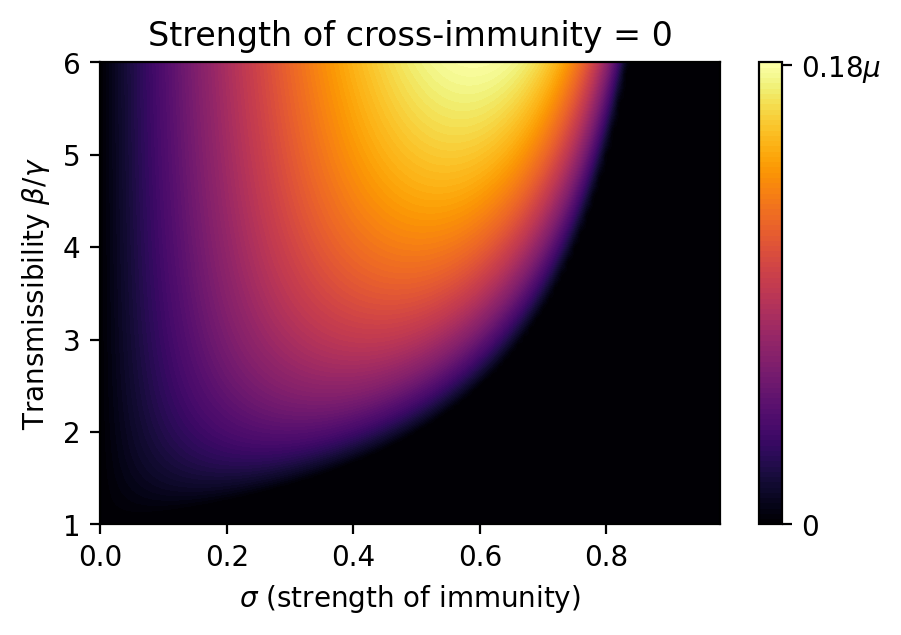

In [6]:
em_rates = np.array(em_rates)
bs_out = np.array(bs_out)
ss_out = np.array(ss_out)
from scipy.interpolate import griddata
R0s = bs_out * 2
# Create grid coordinates for contour plot
sigma_grid, R0_grid = np.mgrid[min(ss_out):max(ss_out):200j, min(R0s):max(R0s):200j]

# Interpolate unstructured data
T_grid = griddata((ss_out, R0s), em_rates, (sigma_grid, R0_grid), method='linear')

# some values will show up as e.g. -1e-25, fiducially.
# so set those to zero:
T_grid[T_grid < 0] = 0


print("1/T between", np.min(em_rates), "and", np.max(em_rates))

# Create the contour plot

plt.figure(figsize=(5, 3), dpi=200)
#plt.contourf(sigma_grid, R0_grid, T_grid, levels=100, cmap='inferno', extend='min')
plt.contourf(sigma_grid, R0_grid, T_grid, levels=100, cmap='inferno')
#cbar = plt.colorbar(label=r'Rate of adaptation ($1/T_{escape}$)', ticks=np.arange(0.001, 0.00701, 0.001))
#cbar = plt.colorbar(label=r'Rate of adaptation ($1/T_{escape}$)', ticks=np.arange(0.001, np.max(1/Ts), 0.001))
#cbar = plt.colorbar(label=r'Rate of adaptation ($1/T_{escape}$)', ticks=[])

cbar = plt.colorbar()
plt.clim(0, emr_max) # sigma21 = 0

cbar.formatter.set_powerlimits((0, 0))
cbar.formatter.set_useMathText(True)

cbar.set_ticks([0, np.max(em_rates)])
cbar.ax.set_yticklabels(["0", f"{np.round(np.max(em_rates),2)}"+r"$\mu$"  ])  # vertically oriented colorbar
plt.xlabel(r'$\sigma$ (strength of immunity)')
plt.ylabel(r'Transmissibility $\beta/\gamma$')
plt.title(f'Strength of cross-immunity = {np.round(sigma_c,3)}')
plt.show()

# Fig S2B

In [7]:
em_rates = []
bs_out = []
ss_out = []
n_sims = len(sigmas) * len(betas)

sigma_c = 0.5

i=0
for s in sigmas:
    for b in betas:
        em_rates.append(get_em_rate_at_equi_figS2(beta=b, sigma=s, mu=1, sigma21=sigma_c*s))
        bs_out.append(b)
        ss_out.append(s)
        print(f"{i} out of {n_sims}")
        i += 1

0 out of 12474
1 out of 12474
2 out of 12474
3 out of 12474
4 out of 12474
5 out of 12474
6 out of 12474
7 out of 12474
8 out of 12474
9 out of 12474
10 out of 12474
11 out of 12474
12 out of 12474
13 out of 12474
14 out of 12474
15 out of 12474
16 out of 12474
17 out of 12474
18 out of 12474
19 out of 12474
20 out of 12474
21 out of 12474
22 out of 12474
23 out of 12474
24 out of 12474
25 out of 12474
26 out of 12474
27 out of 12474
28 out of 12474
29 out of 12474
30 out of 12474
31 out of 12474
32 out of 12474
33 out of 12474
34 out of 12474
35 out of 12474
36 out of 12474
37 out of 12474
38 out of 12474
39 out of 12474
40 out of 12474
41 out of 12474
42 out of 12474
43 out of 12474
44 out of 12474
45 out of 12474
46 out of 12474
47 out of 12474
48 out of 12474
49 out of 12474
50 out of 12474
51 out of 12474
52 out of 12474
53 out of 12474
54 out of 12474
55 out of 12474
56 out of 12474
57 out of 12474
58 out of 12474
59 out of 12474
60 out of 12474
61 out of 12474
62 out of 12474
63

1932 out of 12474
1933 out of 12474
1934 out of 12474
1935 out of 12474
1936 out of 12474
1937 out of 12474
1938 out of 12474
1939 out of 12474
1940 out of 12474
1941 out of 12474
1942 out of 12474
1943 out of 12474
1944 out of 12474
1945 out of 12474
1946 out of 12474
1947 out of 12474
1948 out of 12474
1949 out of 12474
1950 out of 12474
1951 out of 12474
1952 out of 12474
1953 out of 12474
1954 out of 12474
1955 out of 12474
1956 out of 12474
1957 out of 12474
1958 out of 12474
1959 out of 12474
1960 out of 12474
1961 out of 12474
1962 out of 12474
1963 out of 12474
1964 out of 12474
1965 out of 12474
1966 out of 12474
1967 out of 12474
1968 out of 12474
1969 out of 12474
1970 out of 12474
1971 out of 12474
1972 out of 12474
1973 out of 12474
1974 out of 12474
1975 out of 12474
1976 out of 12474
1977 out of 12474
1978 out of 12474
1979 out of 12474
1980 out of 12474
1981 out of 12474
1982 out of 12474
1983 out of 12474
1984 out of 12474
1985 out of 12474
1986 out of 12474
1987 out o

2837 out of 12474
2838 out of 12474
2839 out of 12474
2840 out of 12474
2841 out of 12474
2842 out of 12474
2843 out of 12474
2844 out of 12474
2845 out of 12474
2846 out of 12474
2847 out of 12474
2848 out of 12474
2849 out of 12474
2850 out of 12474
2851 out of 12474
2852 out of 12474
2853 out of 12474
2854 out of 12474
2855 out of 12474
2856 out of 12474
2857 out of 12474
2858 out of 12474
2859 out of 12474
2860 out of 12474
2861 out of 12474
2862 out of 12474
2863 out of 12474
2864 out of 12474
2865 out of 12474
2866 out of 12474
2867 out of 12474
2868 out of 12474
2869 out of 12474
2870 out of 12474
2871 out of 12474
2872 out of 12474
2873 out of 12474
2874 out of 12474
2875 out of 12474
2876 out of 12474
2877 out of 12474
2878 out of 12474
2879 out of 12474
2880 out of 12474
2881 out of 12474
2882 out of 12474
2883 out of 12474
2884 out of 12474
2885 out of 12474
2886 out of 12474
2887 out of 12474
2888 out of 12474
2889 out of 12474
2890 out of 12474
2891 out of 12474
2892 out o

3850 out of 12474
3851 out of 12474
3852 out of 12474
3853 out of 12474
3854 out of 12474
3855 out of 12474
3856 out of 12474
3857 out of 12474
3858 out of 12474
3859 out of 12474
3860 out of 12474
3861 out of 12474
3862 out of 12474
3863 out of 12474
3864 out of 12474
3865 out of 12474
3866 out of 12474
3867 out of 12474
3868 out of 12474
3869 out of 12474
3870 out of 12474
3871 out of 12474
3872 out of 12474
3873 out of 12474
3874 out of 12474
3875 out of 12474
3876 out of 12474
3877 out of 12474
3878 out of 12474
3879 out of 12474
3880 out of 12474
3881 out of 12474
3882 out of 12474
3883 out of 12474
3884 out of 12474
3885 out of 12474
3886 out of 12474
3887 out of 12474
3888 out of 12474
3889 out of 12474
3890 out of 12474
3891 out of 12474
3892 out of 12474
3893 out of 12474
3894 out of 12474
3895 out of 12474
3896 out of 12474
3897 out of 12474
3898 out of 12474
3899 out of 12474
3900 out of 12474
3901 out of 12474
3902 out of 12474
3903 out of 12474
3904 out of 12474
3905 out o

4849 out of 12474
4850 out of 12474
4851 out of 12474
4852 out of 12474
4853 out of 12474
4854 out of 12474
4855 out of 12474
4856 out of 12474
4857 out of 12474
4858 out of 12474
4859 out of 12474
4860 out of 12474
4861 out of 12474
4862 out of 12474
4863 out of 12474
4864 out of 12474
4865 out of 12474
4866 out of 12474
4867 out of 12474
4868 out of 12474
4869 out of 12474
4870 out of 12474
4871 out of 12474
4872 out of 12474
4873 out of 12474
4874 out of 12474
4875 out of 12474
4876 out of 12474
4877 out of 12474
4878 out of 12474
4879 out of 12474
4880 out of 12474
4881 out of 12474
4882 out of 12474
4883 out of 12474
4884 out of 12474
4885 out of 12474
4886 out of 12474
4887 out of 12474
4888 out of 12474
4889 out of 12474
4890 out of 12474
4891 out of 12474
4892 out of 12474
4893 out of 12474
4894 out of 12474
4895 out of 12474
4896 out of 12474
4897 out of 12474
4898 out of 12474
4899 out of 12474
4900 out of 12474
4901 out of 12474
4902 out of 12474
4903 out of 12474
4904 out o

5828 out of 12474
5829 out of 12474
5830 out of 12474
5831 out of 12474
5832 out of 12474
5833 out of 12474
5834 out of 12474
5835 out of 12474
5836 out of 12474
5837 out of 12474
5838 out of 12474
5839 out of 12474
5840 out of 12474
5841 out of 12474
5842 out of 12474
5843 out of 12474
5844 out of 12474
5845 out of 12474
5846 out of 12474
5847 out of 12474
5848 out of 12474
5849 out of 12474
5850 out of 12474
5851 out of 12474
5852 out of 12474
5853 out of 12474
5854 out of 12474
5855 out of 12474
5856 out of 12474
5857 out of 12474
5858 out of 12474
5859 out of 12474
5860 out of 12474
5861 out of 12474
5862 out of 12474
5863 out of 12474
5864 out of 12474
5865 out of 12474
5866 out of 12474
5867 out of 12474
5868 out of 12474
5869 out of 12474
5870 out of 12474
5871 out of 12474
5872 out of 12474
5873 out of 12474
5874 out of 12474
5875 out of 12474
5876 out of 12474
5877 out of 12474
5878 out of 12474
5879 out of 12474
5880 out of 12474
5881 out of 12474
5882 out of 12474
5883 out o

6829 out of 12474
6830 out of 12474
6831 out of 12474
6832 out of 12474
6833 out of 12474
6834 out of 12474
6835 out of 12474
6836 out of 12474
6837 out of 12474
6838 out of 12474
6839 out of 12474
6840 out of 12474
6841 out of 12474
6842 out of 12474
6843 out of 12474
6844 out of 12474
6845 out of 12474
6846 out of 12474
6847 out of 12474
6848 out of 12474
6849 out of 12474
6850 out of 12474
6851 out of 12474
6852 out of 12474
6853 out of 12474
6854 out of 12474
6855 out of 12474
6856 out of 12474
6857 out of 12474
6858 out of 12474
6859 out of 12474
6860 out of 12474
6861 out of 12474
6862 out of 12474
6863 out of 12474
6864 out of 12474
6865 out of 12474
6866 out of 12474
6867 out of 12474
6868 out of 12474
6869 out of 12474
6870 out of 12474
6871 out of 12474
6872 out of 12474
6873 out of 12474
6874 out of 12474
6875 out of 12474
6876 out of 12474
6877 out of 12474
6878 out of 12474
6879 out of 12474
6880 out of 12474
6881 out of 12474
6882 out of 12474
6883 out of 12474
6884 out o

7837 out of 12474
7838 out of 12474
7839 out of 12474
7840 out of 12474
7841 out of 12474
7842 out of 12474
7843 out of 12474
7844 out of 12474
7845 out of 12474
7846 out of 12474
7847 out of 12474
7848 out of 12474
7849 out of 12474
7850 out of 12474
7851 out of 12474
7852 out of 12474
7853 out of 12474
7854 out of 12474
7855 out of 12474
7856 out of 12474
7857 out of 12474
7858 out of 12474
7859 out of 12474
7860 out of 12474
7861 out of 12474
7862 out of 12474
7863 out of 12474
7864 out of 12474
7865 out of 12474
7866 out of 12474
7867 out of 12474
7868 out of 12474
7869 out of 12474
7870 out of 12474
7871 out of 12474
7872 out of 12474
7873 out of 12474
7874 out of 12474
7875 out of 12474
7876 out of 12474
7877 out of 12474
7878 out of 12474
7879 out of 12474
7880 out of 12474
7881 out of 12474
7882 out of 12474
7883 out of 12474
7884 out of 12474
7885 out of 12474
7886 out of 12474
7887 out of 12474
7888 out of 12474
7889 out of 12474
7890 out of 12474
7891 out of 12474
7892 out o

8848 out of 12474
8849 out of 12474
8850 out of 12474
8851 out of 12474
8852 out of 12474
8853 out of 12474
8854 out of 12474
8855 out of 12474
8856 out of 12474
8857 out of 12474
8858 out of 12474
8859 out of 12474
8860 out of 12474
8861 out of 12474
8862 out of 12474
8863 out of 12474
8864 out of 12474
8865 out of 12474
8866 out of 12474
8867 out of 12474
8868 out of 12474
8869 out of 12474
8870 out of 12474
8871 out of 12474
8872 out of 12474
8873 out of 12474
8874 out of 12474
8875 out of 12474
8876 out of 12474
8877 out of 12474
8878 out of 12474
8879 out of 12474
8880 out of 12474
8881 out of 12474
8882 out of 12474
8883 out of 12474
8884 out of 12474
8885 out of 12474
8886 out of 12474
8887 out of 12474
8888 out of 12474
8889 out of 12474
8890 out of 12474
8891 out of 12474
8892 out of 12474
8893 out of 12474
8894 out of 12474
8895 out of 12474
8896 out of 12474
8897 out of 12474
8898 out of 12474
8899 out of 12474
8900 out of 12474
8901 out of 12474
8902 out of 12474
8903 out o

9855 out of 12474
9856 out of 12474
9857 out of 12474
9858 out of 12474
9859 out of 12474
9860 out of 12474
9861 out of 12474
9862 out of 12474
9863 out of 12474
9864 out of 12474
9865 out of 12474
9866 out of 12474
9867 out of 12474
9868 out of 12474
9869 out of 12474
9870 out of 12474
9871 out of 12474
9872 out of 12474
9873 out of 12474
9874 out of 12474
9875 out of 12474
9876 out of 12474
9877 out of 12474
9878 out of 12474
9879 out of 12474
9880 out of 12474
9881 out of 12474
9882 out of 12474
9883 out of 12474
9884 out of 12474
9885 out of 12474
9886 out of 12474
9887 out of 12474
9888 out of 12474
9889 out of 12474
9890 out of 12474
9891 out of 12474
9892 out of 12474
9893 out of 12474
9894 out of 12474
9895 out of 12474
9896 out of 12474
9897 out of 12474
9898 out of 12474
9899 out of 12474
9900 out of 12474
9901 out of 12474
9902 out of 12474
9903 out of 12474
9904 out of 12474
9905 out of 12474
9906 out of 12474
9907 out of 12474
9908 out of 12474
9909 out of 12474
9910 out o

10859 out of 12474
10860 out of 12474
10861 out of 12474
10862 out of 12474
10863 out of 12474
10864 out of 12474
10865 out of 12474
10866 out of 12474
10867 out of 12474
10868 out of 12474
10869 out of 12474
10870 out of 12474
10871 out of 12474
10872 out of 12474
10873 out of 12474
10874 out of 12474
10875 out of 12474
10876 out of 12474
10877 out of 12474
10878 out of 12474
10879 out of 12474
10880 out of 12474
10881 out of 12474
10882 out of 12474
10883 out of 12474
10884 out of 12474
10885 out of 12474
10886 out of 12474
10887 out of 12474
10888 out of 12474
10889 out of 12474
10890 out of 12474
10891 out of 12474
10892 out of 12474
10893 out of 12474
10894 out of 12474
10895 out of 12474
10896 out of 12474
10897 out of 12474
10898 out of 12474
10899 out of 12474
10900 out of 12474
10901 out of 12474
10902 out of 12474
10903 out of 12474
10904 out of 12474
10905 out of 12474
10906 out of 12474
10907 out of 12474
10908 out of 12474
10909 out of 12474
10910 out of 12474
10911 out of

11848 out of 12474
11849 out of 12474
11850 out of 12474
11851 out of 12474
11852 out of 12474
11853 out of 12474
11854 out of 12474
11855 out of 12474
11856 out of 12474
11857 out of 12474
11858 out of 12474
11859 out of 12474
11860 out of 12474
11861 out of 12474
11862 out of 12474
11863 out of 12474
11864 out of 12474
11865 out of 12474
11866 out of 12474
11867 out of 12474
11868 out of 12474
11869 out of 12474
11870 out of 12474
11871 out of 12474
11872 out of 12474
11873 out of 12474
11874 out of 12474
11875 out of 12474
11876 out of 12474
11877 out of 12474
11878 out of 12474
11879 out of 12474
11880 out of 12474
11881 out of 12474
11882 out of 12474
11883 out of 12474
11884 out of 12474
11885 out of 12474
11886 out of 12474
11887 out of 12474
11888 out of 12474
11889 out of 12474
11890 out of 12474
11891 out of 12474
11892 out of 12474
11893 out of 12474
11894 out of 12474
11895 out of 12474
11896 out of 12474
11897 out of 12474
11898 out of 12474
11899 out of 12474
11900 out of

1/T between 0.0 and 0.12636165577342054


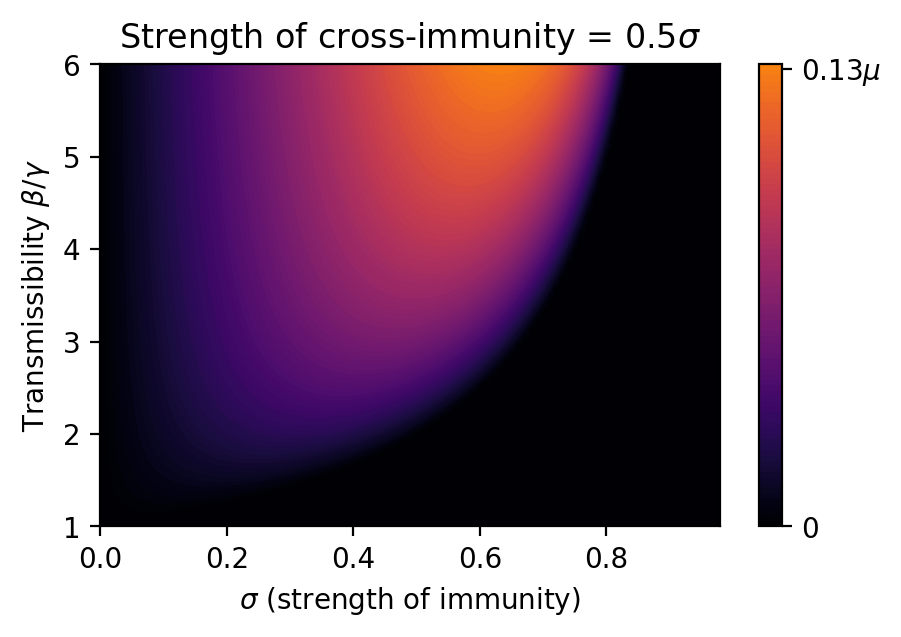

In [8]:
em_rates = np.array(em_rates)
bs_out = np.array(bs_out)
ss_out = np.array(ss_out)
from scipy.interpolate import griddata
R0s = bs_out * 2
# Create grid coordinates for contour plot
sigma_grid, R0_grid = np.mgrid[min(ss_out):max(ss_out):200j, min(R0s):max(R0s):200j]

# Interpolate unstructured data
T_grid = griddata((ss_out, R0s), em_rates, (sigma_grid, R0_grid), method='linear')

# some values will show up as e.g. -1e-25, fiducially.
# so set those to zero:
T_grid[T_grid < 0] = 0


print("1/T between", np.min(em_rates), "and", np.max(em_rates))

# Create the contour plot

plt.figure(figsize=(5, 3), dpi=200)
#plt.contourf(sigma_grid, R0_grid, T_grid, levels=100, cmap='inferno', extend='min')
plt.contourf(sigma_grid, R0_grid, T_grid, levels=100, cmap='inferno')
#cbar = plt.colorbar(label=r'Rate of adaptation ($1/T_{escape}$)', ticks=np.arange(0.001, 0.00701, 0.001))
#cbar = plt.colorbar(label=r'Rate of adaptation ($1/T_{escape}$)', ticks=np.arange(0.001, np.max(1/Ts), 0.001))
#cbar = plt.colorbar(label=r'Rate of adaptation ($1/T_{escape}$)', ticks=[])

cbar = plt.colorbar()
plt.clim(0, emr_max) # sigma21 = 0

cbar.formatter.set_powerlimits((0, 0))
cbar.formatter.set_useMathText(True)

cbar.set_ticks([0, np.max(em_rates)])
cbar.ax.set_yticklabels(["0", f"{np.round(np.max(em_rates),2)}"+r"$\mu$"  ])  # vertically oriented colorbar
plt.xlabel(r'$\sigma$ (strength of immunity)')
plt.ylabel(r'Transmissibility $\beta/\gamma$')
plt.title(f'Strength of cross-immunity = {np.round(sigma_c,3)}' + r'$\sigma$')
plt.show()

# Fig S2C

In [9]:
em_rates = []
bs_out = []
ss_out = []
n_sims = len(sigmas) * len(betas)

sigma_c = 0.9

i=0
for s in sigmas:
    for b in betas:
        em_rates.append(get_em_rate_at_equi_figS2(beta=b, sigma=s, mu=1, sigma21=sigma_c*s))
        bs_out.append(b)
        ss_out.append(s)
        print(f"{i} out of {n_sims}")
        i += 1

0 out of 12474
1 out of 12474
2 out of 12474
3 out of 12474
4 out of 12474
5 out of 12474
6 out of 12474
7 out of 12474
8 out of 12474
9 out of 12474
10 out of 12474
11 out of 12474
12 out of 12474
13 out of 12474
14 out of 12474
15 out of 12474
16 out of 12474
17 out of 12474
18 out of 12474
19 out of 12474
20 out of 12474
21 out of 12474
22 out of 12474
23 out of 12474
24 out of 12474
25 out of 12474
26 out of 12474
27 out of 12474
28 out of 12474
29 out of 12474
30 out of 12474
31 out of 12474
32 out of 12474
33 out of 12474
34 out of 12474
35 out of 12474
36 out of 12474
37 out of 12474
38 out of 12474
39 out of 12474
40 out of 12474
41 out of 12474
42 out of 12474
43 out of 12474
44 out of 12474
45 out of 12474
46 out of 12474
47 out of 12474
48 out of 12474
49 out of 12474
50 out of 12474
51 out of 12474
52 out of 12474
53 out of 12474
54 out of 12474
55 out of 12474
56 out of 12474
57 out of 12474
58 out of 12474
59 out of 12474
60 out of 12474
61 out of 12474
62 out of 12474
63

2011 out of 12474
2012 out of 12474
2013 out of 12474
2014 out of 12474
2015 out of 12474
2016 out of 12474
2017 out of 12474
2018 out of 12474
2019 out of 12474
2020 out of 12474
2021 out of 12474
2022 out of 12474
2023 out of 12474
2024 out of 12474
2025 out of 12474
2026 out of 12474
2027 out of 12474
2028 out of 12474
2029 out of 12474
2030 out of 12474
2031 out of 12474
2032 out of 12474
2033 out of 12474
2034 out of 12474
2035 out of 12474
2036 out of 12474
2037 out of 12474
2038 out of 12474
2039 out of 12474
2040 out of 12474
2041 out of 12474
2042 out of 12474
2043 out of 12474
2044 out of 12474
2045 out of 12474
2046 out of 12474
2047 out of 12474
2048 out of 12474
2049 out of 12474
2050 out of 12474
2051 out of 12474
2052 out of 12474
2053 out of 12474
2054 out of 12474
2055 out of 12474
2056 out of 12474
2057 out of 12474
2058 out of 12474
2059 out of 12474
2060 out of 12474
2061 out of 12474
2062 out of 12474
2063 out of 12474
2064 out of 12474
2065 out of 12474
2066 out o

2998 out of 12474
2999 out of 12474
3000 out of 12474
3001 out of 12474
3002 out of 12474
3003 out of 12474
3004 out of 12474
3005 out of 12474
3006 out of 12474
3007 out of 12474
3008 out of 12474
3009 out of 12474
3010 out of 12474
3011 out of 12474
3012 out of 12474
3013 out of 12474
3014 out of 12474
3015 out of 12474
3016 out of 12474
3017 out of 12474
3018 out of 12474
3019 out of 12474
3020 out of 12474
3021 out of 12474
3022 out of 12474
3023 out of 12474
3024 out of 12474
3025 out of 12474
3026 out of 12474
3027 out of 12474
3028 out of 12474
3029 out of 12474
3030 out of 12474
3031 out of 12474
3032 out of 12474
3033 out of 12474
3034 out of 12474
3035 out of 12474
3036 out of 12474
3037 out of 12474
3038 out of 12474
3039 out of 12474
3040 out of 12474
3041 out of 12474
3042 out of 12474
3043 out of 12474
3044 out of 12474
3045 out of 12474
3046 out of 12474
3047 out of 12474
3048 out of 12474
3049 out of 12474
3050 out of 12474
3051 out of 12474
3052 out of 12474
3053 out o

4015 out of 12474
4016 out of 12474
4017 out of 12474
4018 out of 12474
4019 out of 12474
4020 out of 12474
4021 out of 12474
4022 out of 12474
4023 out of 12474
4024 out of 12474
4025 out of 12474
4026 out of 12474
4027 out of 12474
4028 out of 12474
4029 out of 12474
4030 out of 12474
4031 out of 12474
4032 out of 12474
4033 out of 12474
4034 out of 12474
4035 out of 12474
4036 out of 12474
4037 out of 12474
4038 out of 12474
4039 out of 12474
4040 out of 12474
4041 out of 12474
4042 out of 12474
4043 out of 12474
4044 out of 12474
4045 out of 12474
4046 out of 12474
4047 out of 12474
4048 out of 12474
4049 out of 12474
4050 out of 12474
4051 out of 12474
4052 out of 12474
4053 out of 12474
4054 out of 12474
4055 out of 12474
4056 out of 12474
4057 out of 12474
4058 out of 12474
4059 out of 12474
4060 out of 12474
4061 out of 12474
4062 out of 12474
4063 out of 12474
4064 out of 12474
4065 out of 12474
4066 out of 12474
4067 out of 12474
4068 out of 12474
4069 out of 12474
4070 out o

5029 out of 12474
5030 out of 12474
5031 out of 12474
5032 out of 12474
5033 out of 12474
5034 out of 12474
5035 out of 12474
5036 out of 12474
5037 out of 12474
5038 out of 12474
5039 out of 12474
5040 out of 12474
5041 out of 12474
5042 out of 12474
5043 out of 12474
5044 out of 12474
5045 out of 12474
5046 out of 12474
5047 out of 12474
5048 out of 12474
5049 out of 12474
5050 out of 12474
5051 out of 12474
5052 out of 12474
5053 out of 12474
5054 out of 12474
5055 out of 12474
5056 out of 12474
5057 out of 12474
5058 out of 12474
5059 out of 12474
5060 out of 12474
5061 out of 12474
5062 out of 12474
5063 out of 12474
5064 out of 12474
5065 out of 12474
5066 out of 12474
5067 out of 12474
5068 out of 12474
5069 out of 12474
5070 out of 12474
5071 out of 12474
5072 out of 12474
5073 out of 12474
5074 out of 12474
5075 out of 12474
5076 out of 12474
5077 out of 12474
5078 out of 12474
5079 out of 12474
5080 out of 12474
5081 out of 12474
5082 out of 12474
5083 out of 12474
5084 out o

6047 out of 12474
6048 out of 12474
6049 out of 12474
6050 out of 12474
6051 out of 12474
6052 out of 12474
6053 out of 12474
6054 out of 12474
6055 out of 12474
6056 out of 12474
6057 out of 12474
6058 out of 12474
6059 out of 12474
6060 out of 12474
6061 out of 12474
6062 out of 12474
6063 out of 12474
6064 out of 12474
6065 out of 12474
6066 out of 12474
6067 out of 12474
6068 out of 12474
6069 out of 12474
6070 out of 12474
6071 out of 12474
6072 out of 12474
6073 out of 12474
6074 out of 12474
6075 out of 12474
6076 out of 12474
6077 out of 12474
6078 out of 12474
6079 out of 12474
6080 out of 12474
6081 out of 12474
6082 out of 12474
6083 out of 12474
6084 out of 12474
6085 out of 12474
6086 out of 12474
6087 out of 12474
6088 out of 12474
6089 out of 12474
6090 out of 12474
6091 out of 12474
6092 out of 12474
6093 out of 12474
6094 out of 12474
6095 out of 12474
6096 out of 12474
6097 out of 12474
6098 out of 12474
6099 out of 12474
6100 out of 12474
6101 out of 12474
6102 out o

7059 out of 12474
7060 out of 12474
7061 out of 12474
7062 out of 12474
7063 out of 12474
7064 out of 12474
7065 out of 12474
7066 out of 12474
7067 out of 12474
7068 out of 12474
7069 out of 12474
7070 out of 12474
7071 out of 12474
7072 out of 12474
7073 out of 12474
7074 out of 12474
7075 out of 12474
7076 out of 12474
7077 out of 12474
7078 out of 12474
7079 out of 12474
7080 out of 12474
7081 out of 12474
7082 out of 12474
7083 out of 12474
7084 out of 12474
7085 out of 12474
7086 out of 12474
7087 out of 12474
7088 out of 12474
7089 out of 12474
7090 out of 12474
7091 out of 12474
7092 out of 12474
7093 out of 12474
7094 out of 12474
7095 out of 12474
7096 out of 12474
7097 out of 12474
7098 out of 12474
7099 out of 12474
7100 out of 12474
7101 out of 12474
7102 out of 12474
7103 out of 12474
7104 out of 12474
7105 out of 12474
7106 out of 12474
7107 out of 12474
7108 out of 12474
7109 out of 12474
7110 out of 12474
7111 out of 12474
7112 out of 12474
7113 out of 12474
7114 out o

8054 out of 12474
8055 out of 12474
8056 out of 12474
8057 out of 12474
8058 out of 12474
8059 out of 12474
8060 out of 12474
8061 out of 12474
8062 out of 12474
8063 out of 12474
8064 out of 12474
8065 out of 12474
8066 out of 12474
8067 out of 12474
8068 out of 12474
8069 out of 12474
8070 out of 12474
8071 out of 12474
8072 out of 12474
8073 out of 12474
8074 out of 12474
8075 out of 12474
8076 out of 12474
8077 out of 12474
8078 out of 12474
8079 out of 12474
8080 out of 12474
8081 out of 12474
8082 out of 12474
8083 out of 12474
8084 out of 12474
8085 out of 12474
8086 out of 12474
8087 out of 12474
8088 out of 12474
8089 out of 12474
8090 out of 12474
8091 out of 12474
8092 out of 12474
8093 out of 12474
8094 out of 12474
8095 out of 12474
8096 out of 12474
8097 out of 12474
8098 out of 12474
8099 out of 12474
8100 out of 12474
8101 out of 12474
8102 out of 12474
8103 out of 12474
8104 out of 12474
8105 out of 12474
8106 out of 12474
8107 out of 12474
8108 out of 12474
8109 out o

9062 out of 12474
9063 out of 12474
9064 out of 12474
9065 out of 12474
9066 out of 12474
9067 out of 12474
9068 out of 12474
9069 out of 12474
9070 out of 12474
9071 out of 12474
9072 out of 12474
9073 out of 12474
9074 out of 12474
9075 out of 12474
9076 out of 12474
9077 out of 12474
9078 out of 12474
9079 out of 12474
9080 out of 12474
9081 out of 12474
9082 out of 12474
9083 out of 12474
9084 out of 12474
9085 out of 12474
9086 out of 12474
9087 out of 12474
9088 out of 12474
9089 out of 12474
9090 out of 12474
9091 out of 12474
9092 out of 12474
9093 out of 12474
9094 out of 12474
9095 out of 12474
9096 out of 12474
9097 out of 12474
9098 out of 12474
9099 out of 12474
9100 out of 12474
9101 out of 12474
9102 out of 12474
9103 out of 12474
9104 out of 12474
9105 out of 12474
9106 out of 12474
9107 out of 12474
9108 out of 12474
9109 out of 12474
9110 out of 12474
9111 out of 12474
9112 out of 12474
9113 out of 12474
9114 out of 12474
9115 out of 12474
9116 out of 12474
9117 out o

10075 out of 12474
10076 out of 12474
10077 out of 12474
10078 out of 12474
10079 out of 12474
10080 out of 12474
10081 out of 12474
10082 out of 12474
10083 out of 12474
10084 out of 12474
10085 out of 12474
10086 out of 12474
10087 out of 12474
10088 out of 12474
10089 out of 12474
10090 out of 12474
10091 out of 12474
10092 out of 12474
10093 out of 12474
10094 out of 12474
10095 out of 12474
10096 out of 12474
10097 out of 12474
10098 out of 12474
10099 out of 12474
10100 out of 12474
10101 out of 12474
10102 out of 12474
10103 out of 12474
10104 out of 12474
10105 out of 12474
10106 out of 12474
10107 out of 12474
10108 out of 12474
10109 out of 12474
10110 out of 12474
10111 out of 12474
10112 out of 12474
10113 out of 12474
10114 out of 12474
10115 out of 12474
10116 out of 12474
10117 out of 12474
10118 out of 12474
10119 out of 12474
10120 out of 12474
10121 out of 12474
10122 out of 12474
10123 out of 12474
10124 out of 12474
10125 out of 12474
10126 out of 12474
10127 out of

11080 out of 12474
11081 out of 12474
11082 out of 12474
11083 out of 12474
11084 out of 12474
11085 out of 12474
11086 out of 12474
11087 out of 12474
11088 out of 12474
11089 out of 12474
11090 out of 12474
11091 out of 12474
11092 out of 12474
11093 out of 12474
11094 out of 12474
11095 out of 12474
11096 out of 12474
11097 out of 12474
11098 out of 12474
11099 out of 12474
11100 out of 12474
11101 out of 12474
11102 out of 12474
11103 out of 12474
11104 out of 12474
11105 out of 12474
11106 out of 12474
11107 out of 12474
11108 out of 12474
11109 out of 12474
11110 out of 12474
11111 out of 12474
11112 out of 12474
11113 out of 12474
11114 out of 12474
11115 out of 12474
11116 out of 12474
11117 out of 12474
11118 out of 12474
11119 out of 12474
11120 out of 12474
11121 out of 12474
11122 out of 12474
11123 out of 12474
11124 out of 12474
11125 out of 12474
11126 out of 12474
11127 out of 12474
11128 out of 12474
11129 out of 12474
11130 out of 12474
11131 out of 12474
11132 out of

12090 out of 12474
12091 out of 12474
12092 out of 12474
12093 out of 12474
12094 out of 12474
12095 out of 12474
12096 out of 12474
12097 out of 12474
12098 out of 12474
12099 out of 12474
12100 out of 12474
12101 out of 12474
12102 out of 12474
12103 out of 12474
12104 out of 12474
12105 out of 12474
12106 out of 12474
12107 out of 12474
12108 out of 12474
12109 out of 12474
12110 out of 12474
12111 out of 12474
12112 out of 12474
12113 out of 12474
12114 out of 12474
12115 out of 12474
12116 out of 12474
12117 out of 12474
12118 out of 12474
12119 out of 12474
12120 out of 12474
12121 out of 12474
12122 out of 12474
12123 out of 12474
12124 out of 12474
12125 out of 12474
12126 out of 12474
12127 out of 12474
12128 out of 12474
12129 out of 12474
12130 out of 12474
12131 out of 12474
12132 out of 12474
12133 out of 12474
12134 out of 12474
12135 out of 12474
12136 out of 12474
12137 out of 12474
12138 out of 12474
12139 out of 12474
12140 out of 12474
12141 out of 12474
12142 out of

1/T between 0.0 and 0.04208868839901269


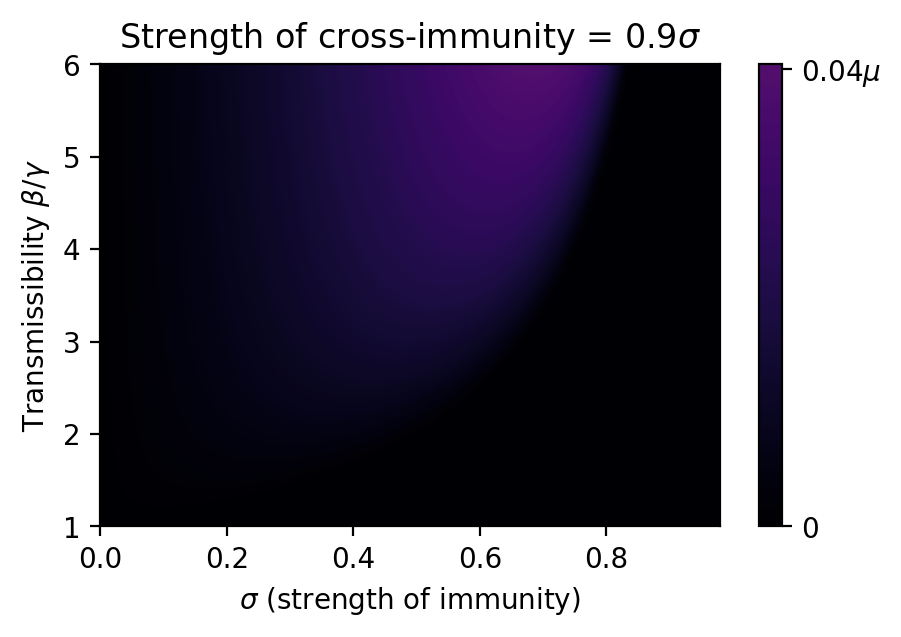

In [10]:
em_rates = np.array(em_rates)
bs_out = np.array(bs_out)
ss_out = np.array(ss_out)
from scipy.interpolate import griddata
R0s = bs_out * 2
# Create grid coordinates for contour plot
sigma_grid, R0_grid = np.mgrid[min(ss_out):max(ss_out):200j, min(R0s):max(R0s):200j]

# Interpolate unstructured data
T_grid = griddata((ss_out, R0s), em_rates, (sigma_grid, R0_grid), method='linear')

# some values will show up as e.g. -1e-25, fiducially.
# so set those to zero:
T_grid[T_grid < 0] = 0


print("1/T between", np.min(em_rates), "and", np.max(em_rates))

# Create the contour plot

plt.figure(figsize=(5, 3), dpi=200)
#plt.contourf(sigma_grid, R0_grid, T_grid, levels=100, cmap='inferno', extend='min')
plt.contourf(sigma_grid, R0_grid, T_grid, levels=100, cmap='inferno')
#cbar = plt.colorbar(label=r'Rate of adaptation ($1/T_{escape}$)', ticks=np.arange(0.001, 0.00701, 0.001))
#cbar = plt.colorbar(label=r'Rate of adaptation ($1/T_{escape}$)', ticks=np.arange(0.001, np.max(1/Ts), 0.001))
#cbar = plt.colorbar(label=r'Rate of adaptation ($1/T_{escape}$)', ticks=[])

cbar = plt.colorbar()
plt.clim(0, emr_max) # sigma21 = 0

cbar.formatter.set_powerlimits((0, 0))
cbar.formatter.set_useMathText(True)

cbar.set_ticks([0, np.max(em_rates)])
cbar.ax.set_yticklabels(["0", f"{np.round(np.max(em_rates),2)}"+r"$\mu$"  ])  # vertically oriented colorbar
plt.xlabel(r'$\sigma$ (strength of immunity)')
plt.ylabel(r'Transmissibility $\beta/\gamma$')
plt.title(f'Strength of cross-immunity = {np.round(sigma_c,3)}' + r'$\sigma$')
plt.show()